### 1. 数据异常值预处理

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
#导入数据
item = pd.read_csv("2.csv")
basket = pd.read_csv("1.csv")

In [4]:
item

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,-0.5


In [5]:
basket

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
1,2018-06-01,D007,3,250200,32.70
2,2018-06-01,D007,1,161068,16.80
3,2018-06-01,D007,8,5325,30.40
4,2018-06-01,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018-07-05,A010,2,284211,34.71
571548,2018-07-05,A010,2,284601,44.80
571549,2018-07-05,A010,2,284241,6.50
571550,2018-07-05,A010,2,284352,15.90


In [6]:
item.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


In [7]:
basket.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [8]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null object
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.8+ MB


In [9]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
SDATE              object
STORE_CODE         object
POSID              int64
BASK_CODE          int64
PROD_CODE          int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE      object
DISCOUNT_AMOUNT    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 132.2+ MB


In [10]:
item=item[item['ITEM_SPEND']>=0]
basket=basket[basket['BASK_SPEND']>=0]

In [11]:
display(item.shape)
display(basket.shape)

(1730741, 10)

(569797, 5)

### 2. 描述性统计

In [12]:
#门店销售分析
storeId_count = basket.groupby('STORE_CODE').count()['BASK_SPEND'].sort_values(ascending=False)
print(storeId_count.head(10))

STORE_CODE
A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
Name: BASK_SPEND, dtype: int64


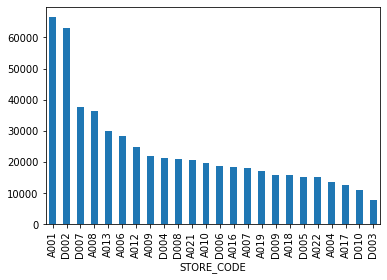

In [13]:
storeId_count.plot(kind='bar')

门店的销售，平均店面销售额为939766，仅有A001,A008,A013,D002,D007达到均值以上，其中D003,D010,A017三个店铺距离均值差距比较大。

In [14]:
#按照自然日分布分析
sales_day = basket[['SHOP_DATETIME', 'BASK_SPEND']]

In [15]:
#分组求和
sales_day = sales_day.groupby(['SHOP_DATETIME']).sum()

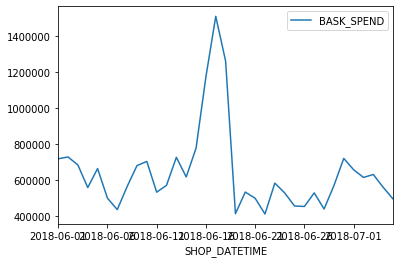

In [16]:
sales_day.plot()

从图中可以看出，在6月17日销售额达到了巅峰，大体是呈正态分布的。

In [17]:
#产品价格分布分析
prices = []
for price in item['ITEM_SPEND']:
    if 0 <= price < 5:
        prices.append(1)  #  1
    elif 5 <= price < 10:
        prices.append(2)  # 
    elif 10 <= price < 20:
        prices.append(3)  #
    elif 20 <= price < 100:
        prices.append(4)  #
    elif 100 <= price < 500:
        prices.append(5)  #
    elif 500 <= price < 2000:
        prices.append(6)  #
    elif 2000 <= price:
        prices.append(7)  #
        
item['price'] = pd.DataFrame(prices)

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, '价格')

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\matplotlib\backe

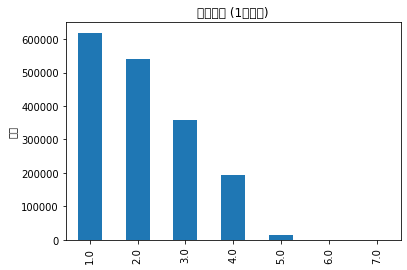

In [18]:
item.price.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"分布情况 (1为获救)") # 标题
plt.ylabel(u"价格")  

可以看出，价格小于20的最多，大于20小于50的其次。

### 3. 商品情况分析

In [19]:
#销售前10分析
productId_count = item.groupby('PROD_CODE')['BASK_CODE'].count().sort_values(ascending=False)
print(productId_count.head(10))

PROD_CODE
205540    12617
21835     10455
194690     9530
72811      7744
178462     7372
197532     7287
205437     6721
1557       6036
109584     5932
216571     5673
Name: BASK_CODE, dtype: int64


In [20]:
#销售额前10情况
productId_amount = item.groupby('PROD_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(productId_amount.head(10))

PROD_CODE
7137      405783.50
7133      289784.00
136839    281211.40
149413    173820.33
1239      149153.20
154900    141034.70
220834    127622.90
21835     114483.25
88160     103467.20
3971       84972.00
Name: ITEM_SPEND, dtype: float64


In [21]:
#折扣与销售分析
discount_category=item.groupby(['DISCOUNT_TYPE']).sum()[['ITEM_SPEND']]
discount_category.sort_values('ITEM_SPEND',ascending=False,inplace=True)
discount_category['cum_percent']=discount_category['ITEM_SPEND'].cumsum()/discount_category['ITEM_SPEND'].sum()
discount_category.reset_index()

,DISCOUNT_TYPE,ITEM_SPEND,cum_percent
0,n,1.468634e+07,0.651152
1,p,5.355779e+06,0.888613
2,m,2.155000e+06,0.984160
3,v,1.910762e+05,0.992632
4,x,9.161940e+04,0.996694
5,q,4.618240e+04,0.998741
6,Z,2.479515e+04,0.999841
7,s,3.573290e+03,0.999999
8,h,2.150000e+01,1.000000


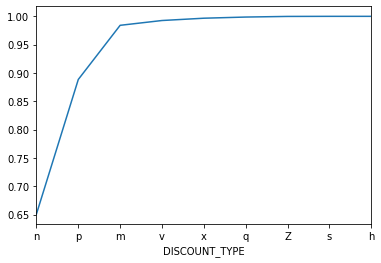

In [22]:
discount_category['cum_percent'].plot()

可以看出，前三种商品占据了90%的销售情况。

### 4. 用户下单分析 

In [23]:
# 客户消费分析
grouped_Customer = basket[['BASK_CODE','SHOP_DATETIME', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
grouped_Customer.head()

,BASK_CODE,SHOP_DATETIME,BASK_SPEND
0,250458,2018-06-01,8.0
215288,250469,2018-06-01,89.7
215287,161017,2018-06-01,9.9
215286,161158,2018-06-01,4.0
215285,250476,2018-06-01,86.4
...,...,...,...
355739,124578,2018-07-05,23.4
355738,124587,2018-07-05,10.0
355737,141664,2018-07-05,149.8
355819,291779,2018-07-05,7.2


In [24]:
grouped_Customer.count().describe()

,SHOP_DATETIME,BASK_SPEND
count,280816.000000,280816.000000
mean,2.029076,2.029076
std,1.077605,1.077605
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,7.000000,7.000000


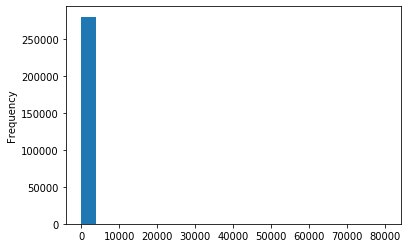

In [25]:
# 用户消费金额分布图
grouped_Customer.sum().BASK_SPEND.plot.hist(bins = 20)

可以看出，0-20元的商品销售量最多。

In [26]:
# 新老用户消费分析
user_life =grouped_Customer.SHOP_DATETIME.agg(['min','max'])
(user_life['min'] == user_life['max']).value_counts()

False    169535
True     111281
dtype: int64

([<matplotlib.patches.Wedge at 0x25b2f94fba8>,
 [Text(-0.3521304189966928, 1.0421152373980593, 'False'),
  Text(0.35213051656656097, -1.042115204429226, 'True')],
 [Text(-0.19207113763455969, 0.5684264931262142, '60.37%'),
  Text(0.1920711908544878, -0.568426475143214, '39.63%')])

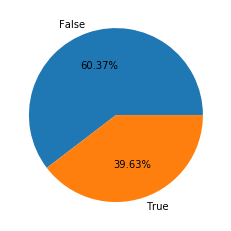

In [27]:
# 可视化（饼图）
plt.pie((user_life['min'] == user_life['max']).value_counts(normalize = True),
       autopct='%.2f%%',
       labels = (user_life['min'] == user_life['max']).value_counts().index)

### 用户消费金额分布 

{'whiskers': [<matplotlib.lines.Line2D at 0x25b2f98eb70>,
 'caps': [<matplotlib.lines.Line2D at 0x25b30ead2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b2f98ea20>],
 'medians': [<matplotlib.lines.Line2D at 0x25b30ead940>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b30eadc88>],
 'means': []}

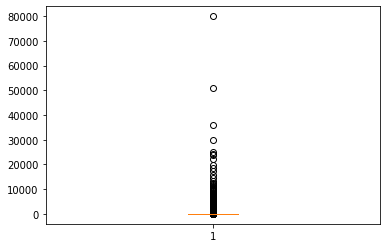

In [28]:
plt.figure()
plt.subplot()
plt.boxplot(basket["BASK_SPEND"])

可以看出用户消费金额大都集中在0-1000元以内,从上述直方图可以看出，用户消费金额，绝大部分是呈现集中趋势.

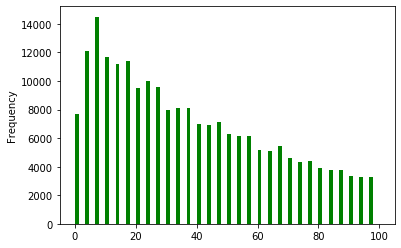

In [29]:
grouped_Customer.sum().query('BASK_SPEND < 100').BASK_SPEND.plot.hist(width=[1.3],color='green',bins = 30)

### 累计消费占比

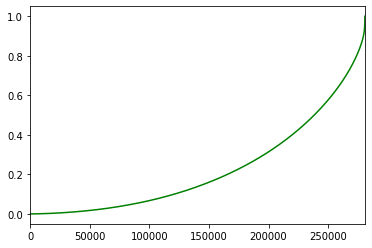

In [30]:
# 用户累计消费占比（百分之多少的用户占百分之多少的销售额）
grouped_Customer.sum().sort_values('BASK_SPEND').apply(lambda x : x.cumsum()/ x.sum()).reset_index().BASK_SPEND.plot(color='g')

我们可以发现：30%的用户贡献了70%的消费额度，而排名前5000的用户就贡献了40%的消费额.

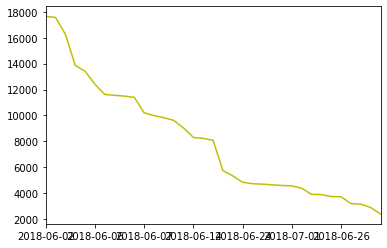

In [31]:
# 用户第一次消费（首购）
grouped_Customer.min().SHOP_DATETIME.value_counts().plot(color='y')

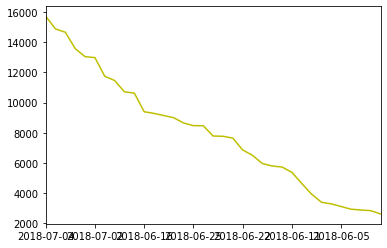

In [32]:
# 用户最后一次消费
grouped_Customer.max().SHOP_DATETIME.value_counts().plot(color='y')